# テーマ
're-calibration-with-neon-niihama'では取得した波長の範囲が小さすぎて、ネオン線の特定ができなかったのでやり直した

In [1]:
%pylab inline

import os
from os.path import join
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


In [3]:
bpth = join(os.path.expanduser('~'), 'works', 'myLeprecon')
specpath = join(bpth, 'SpectrometerData', '20201006-2')

# Plot waterfall

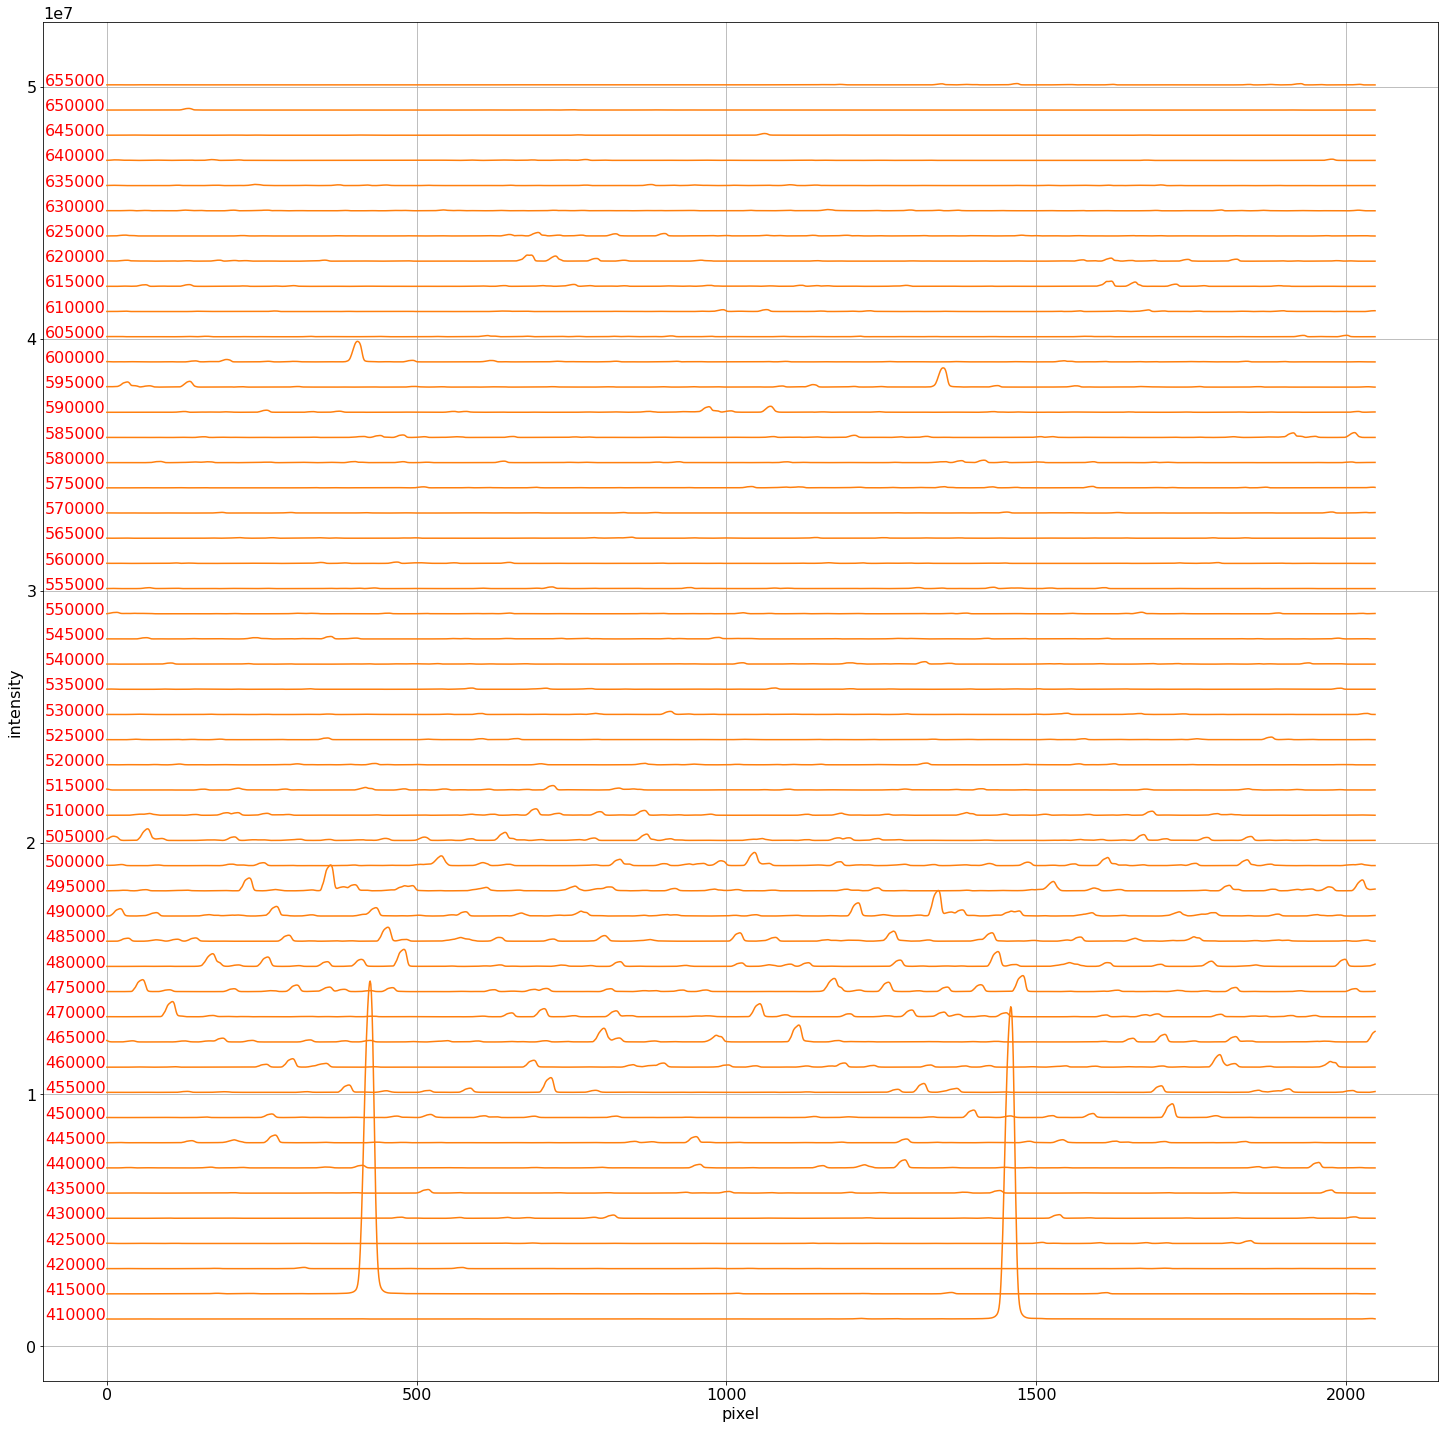

In [18]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

R = [f'H_{410000 + 5000 * i}.nc' for i in range(50)]
for i, fp in enumerate(R):
    image_data = xr.open_dataset(join(specpath, fp))

    plot(image_data.to_array()[0].sum(axis=0) + i * 1e6, f'C1')
         
[text(-100, 1.055e6 + 1e6 * i, t[2:-3], color='r') for i, t in enumerate(R)]
xlabel('pixel')
ylabel('intensity')
rcParams['font.size'] = 12
grid()

### Hydrogen

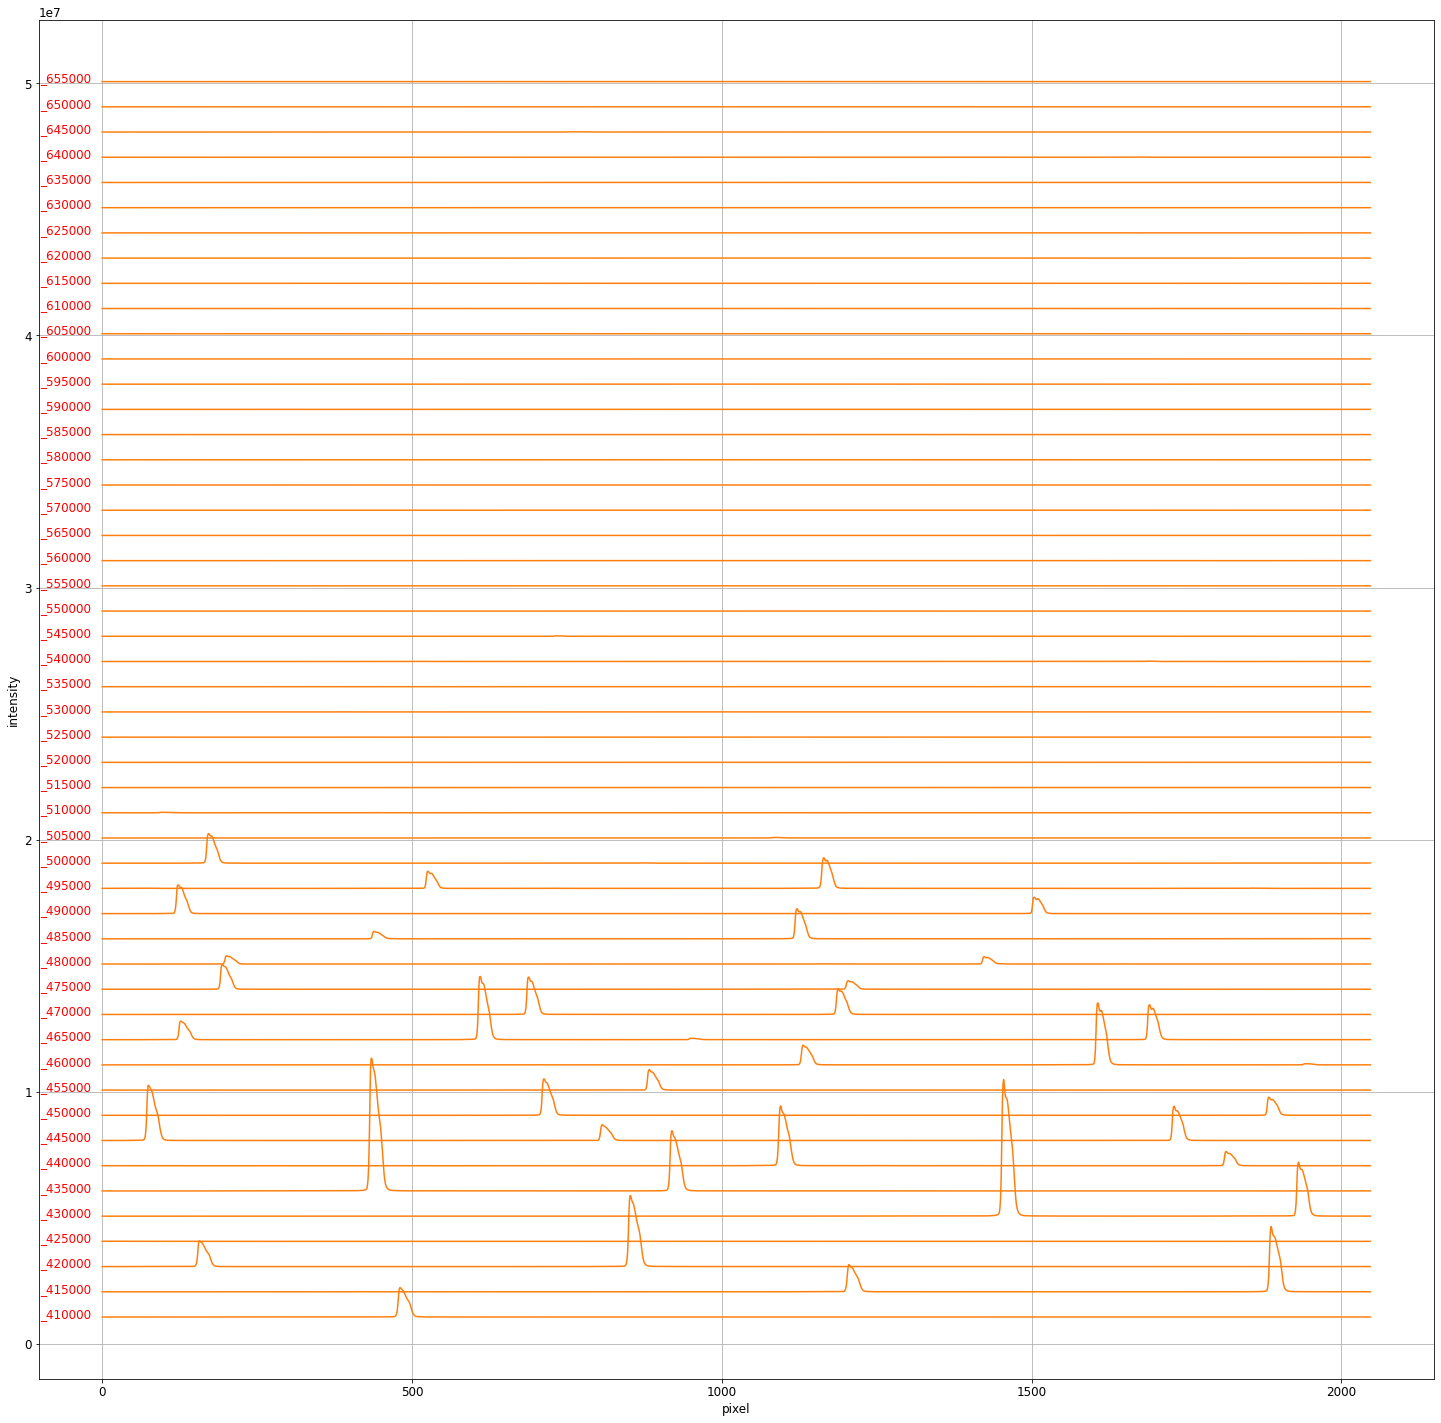

In [20]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

R = [f'Ne_{410000 + 5000 * i}.nc' for i in range(50)]
for i, fp in enumerate(R):
    image_data = xr.open_dataset(join(specpath, fp))

    plot(image_data.to_array()[0].sum(axis=0) + i * 1e6, f'C1')
         
[text(-100, 1.055e6 + 1e6 * i, t[2:-3], color='r') for i, t in enumerate(R)]
xlabel('pixel')
ylabel('intensity')
rcParams['font.size'] = 12
grid()

# 重なり量を求める
### Neon

(1000.0, 2000.0)

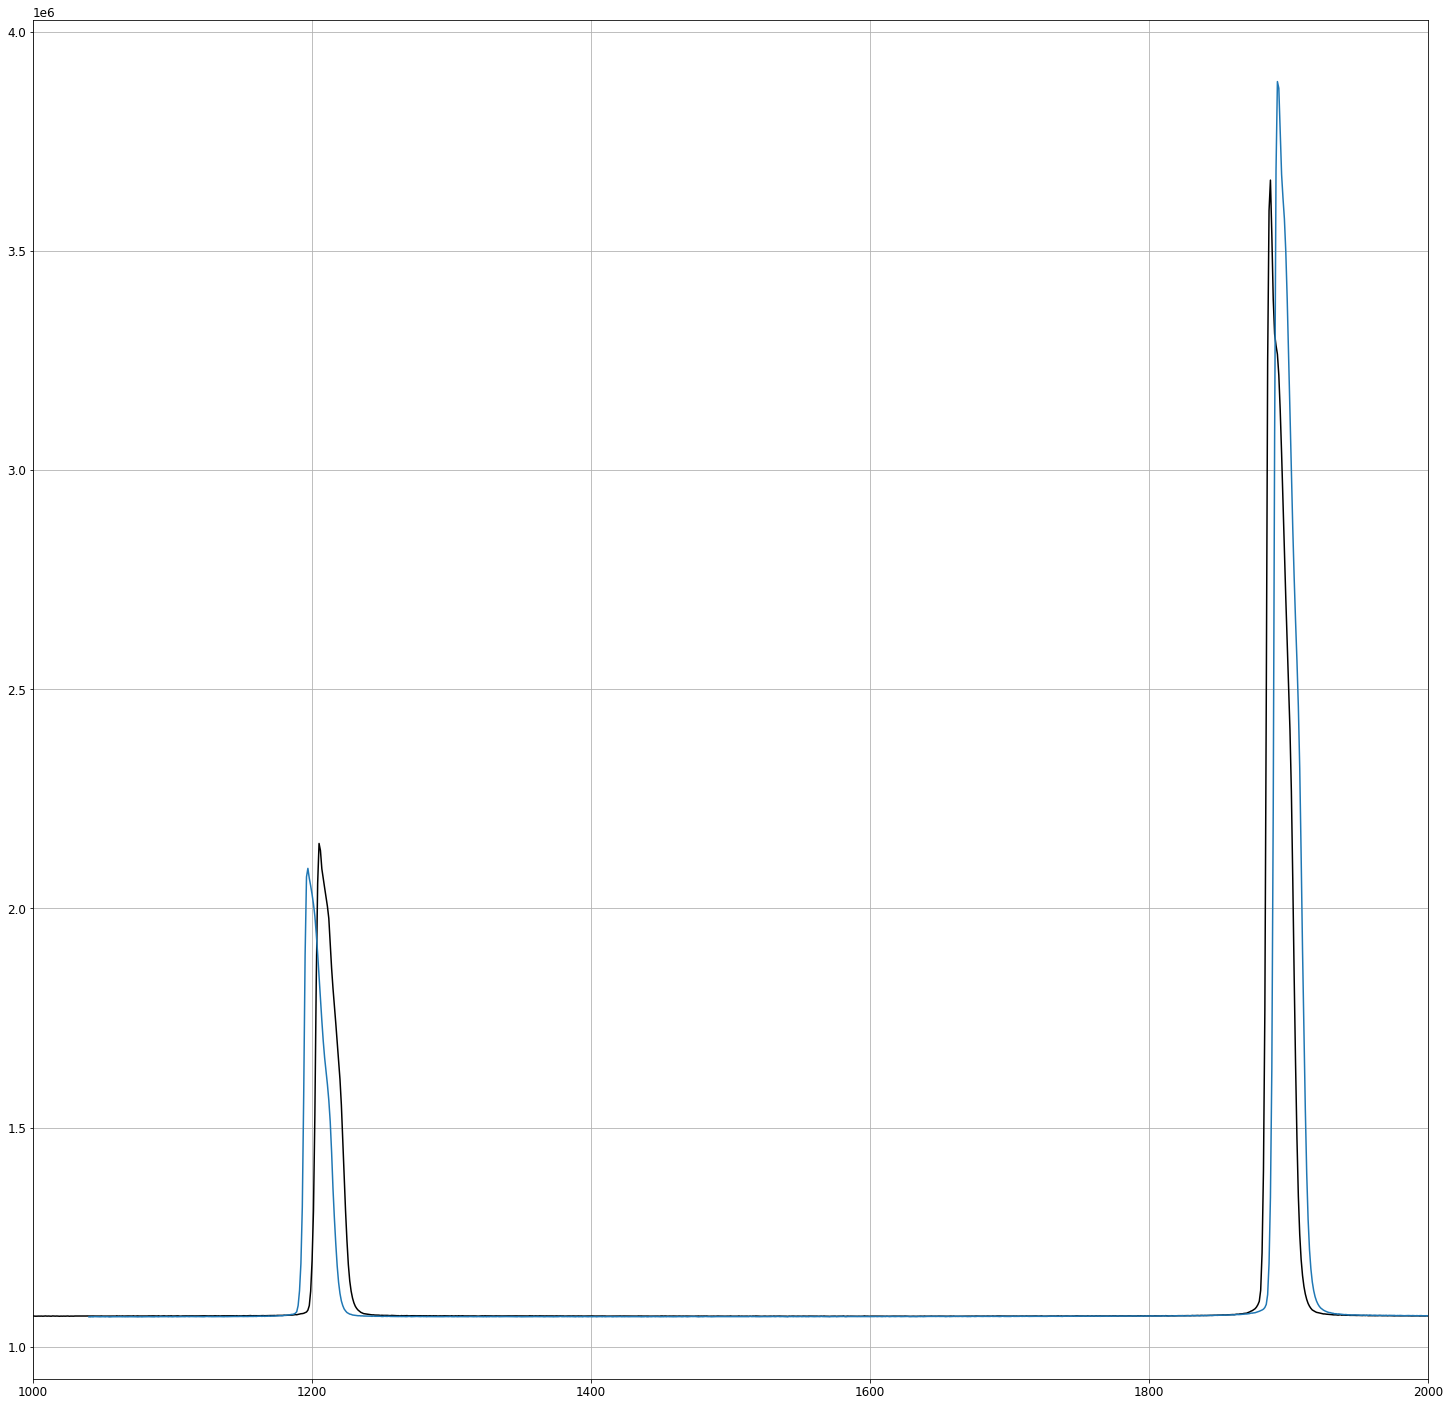

In [22]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'Ne_415000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'Ne_420000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 1040, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000.0, 2000.0)

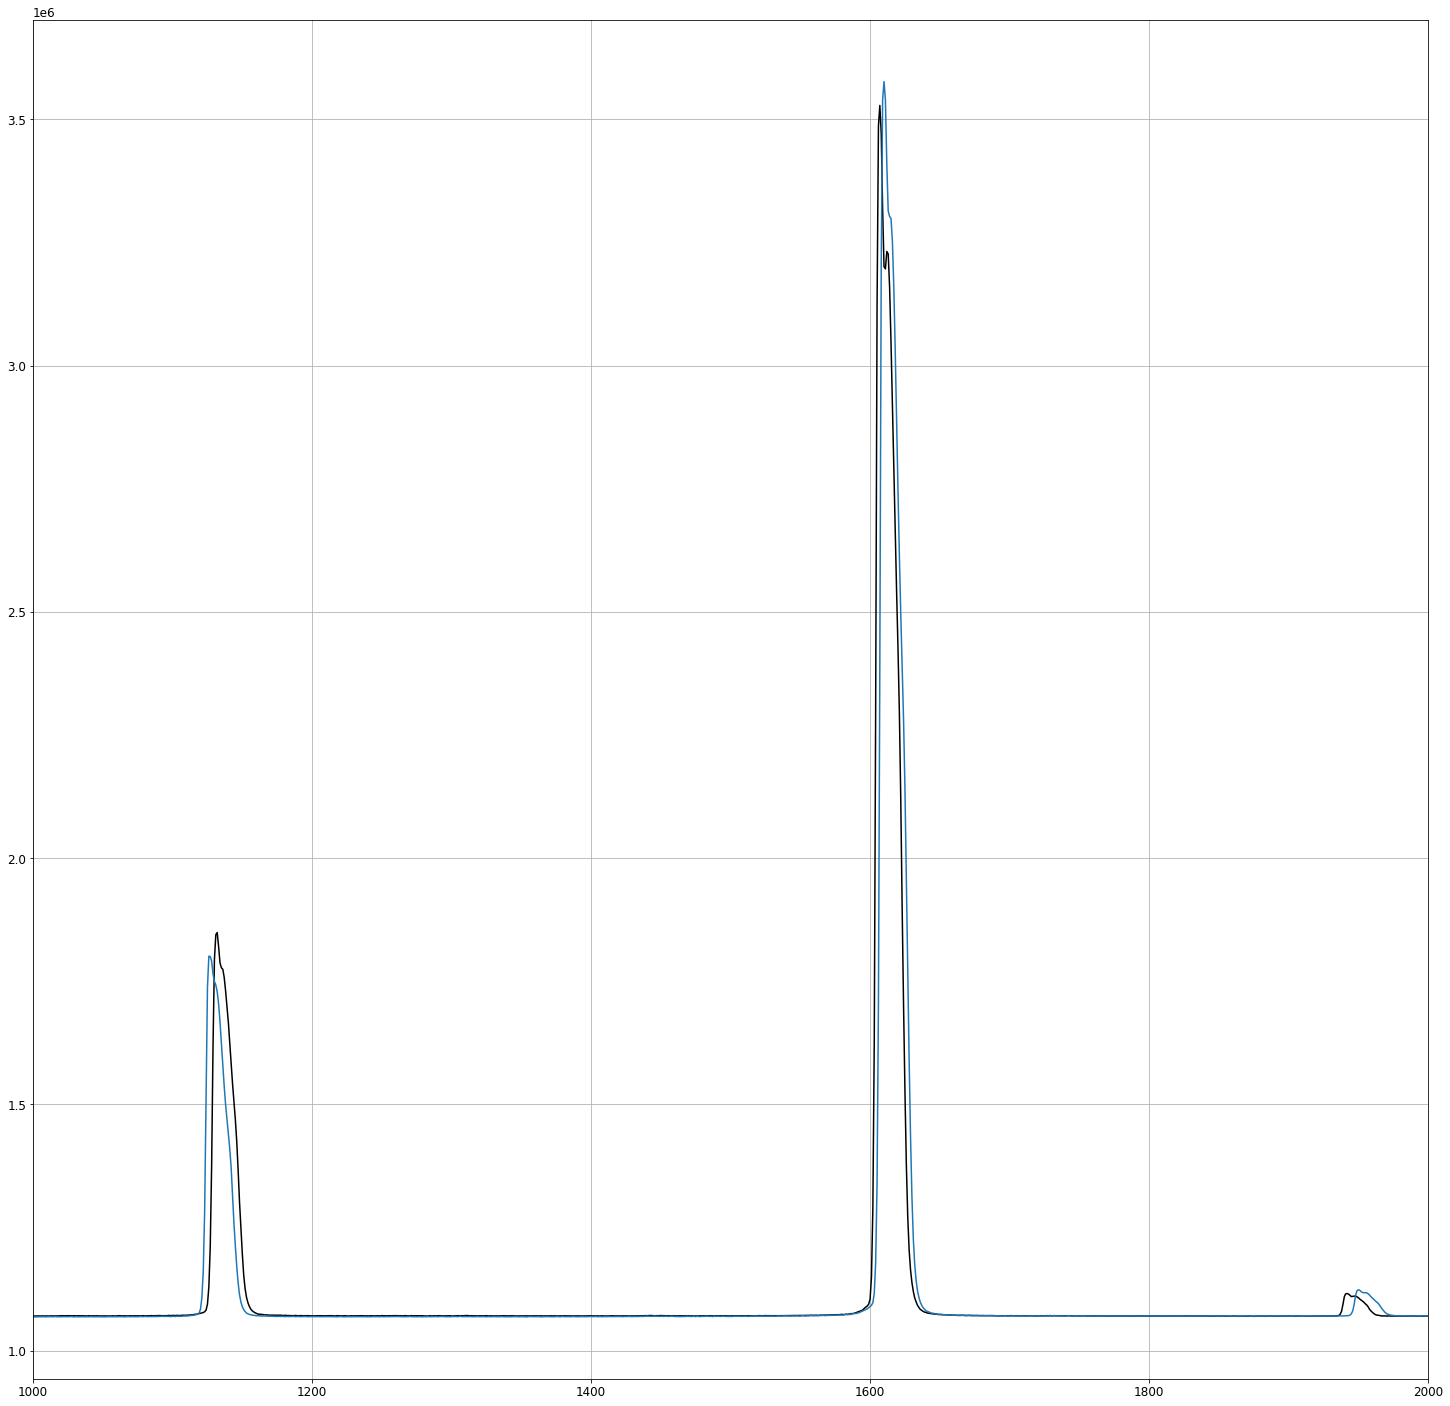

In [25]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'Ne_460000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'Ne_465000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 1000, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000.0, 2000.0)

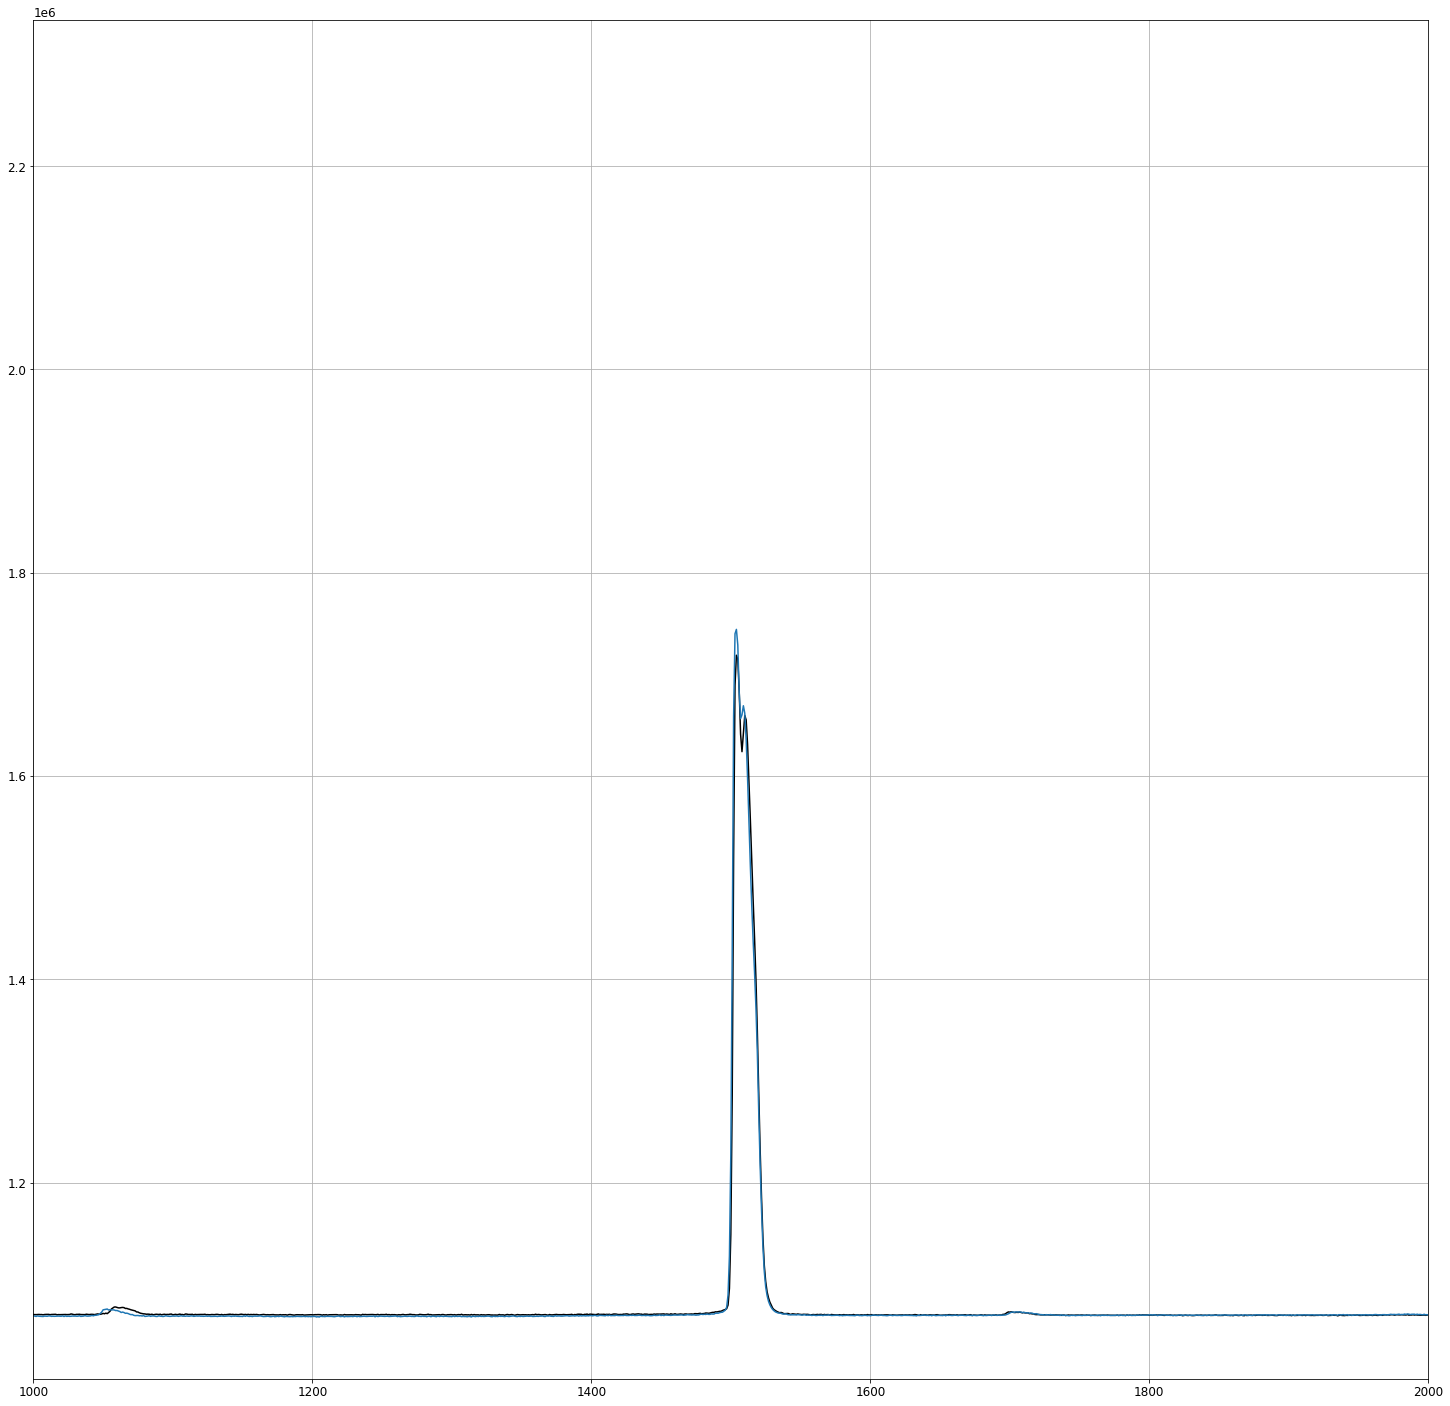

In [27]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'Ne_490000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'Ne_495000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 978, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000000.0, 1200000.0)

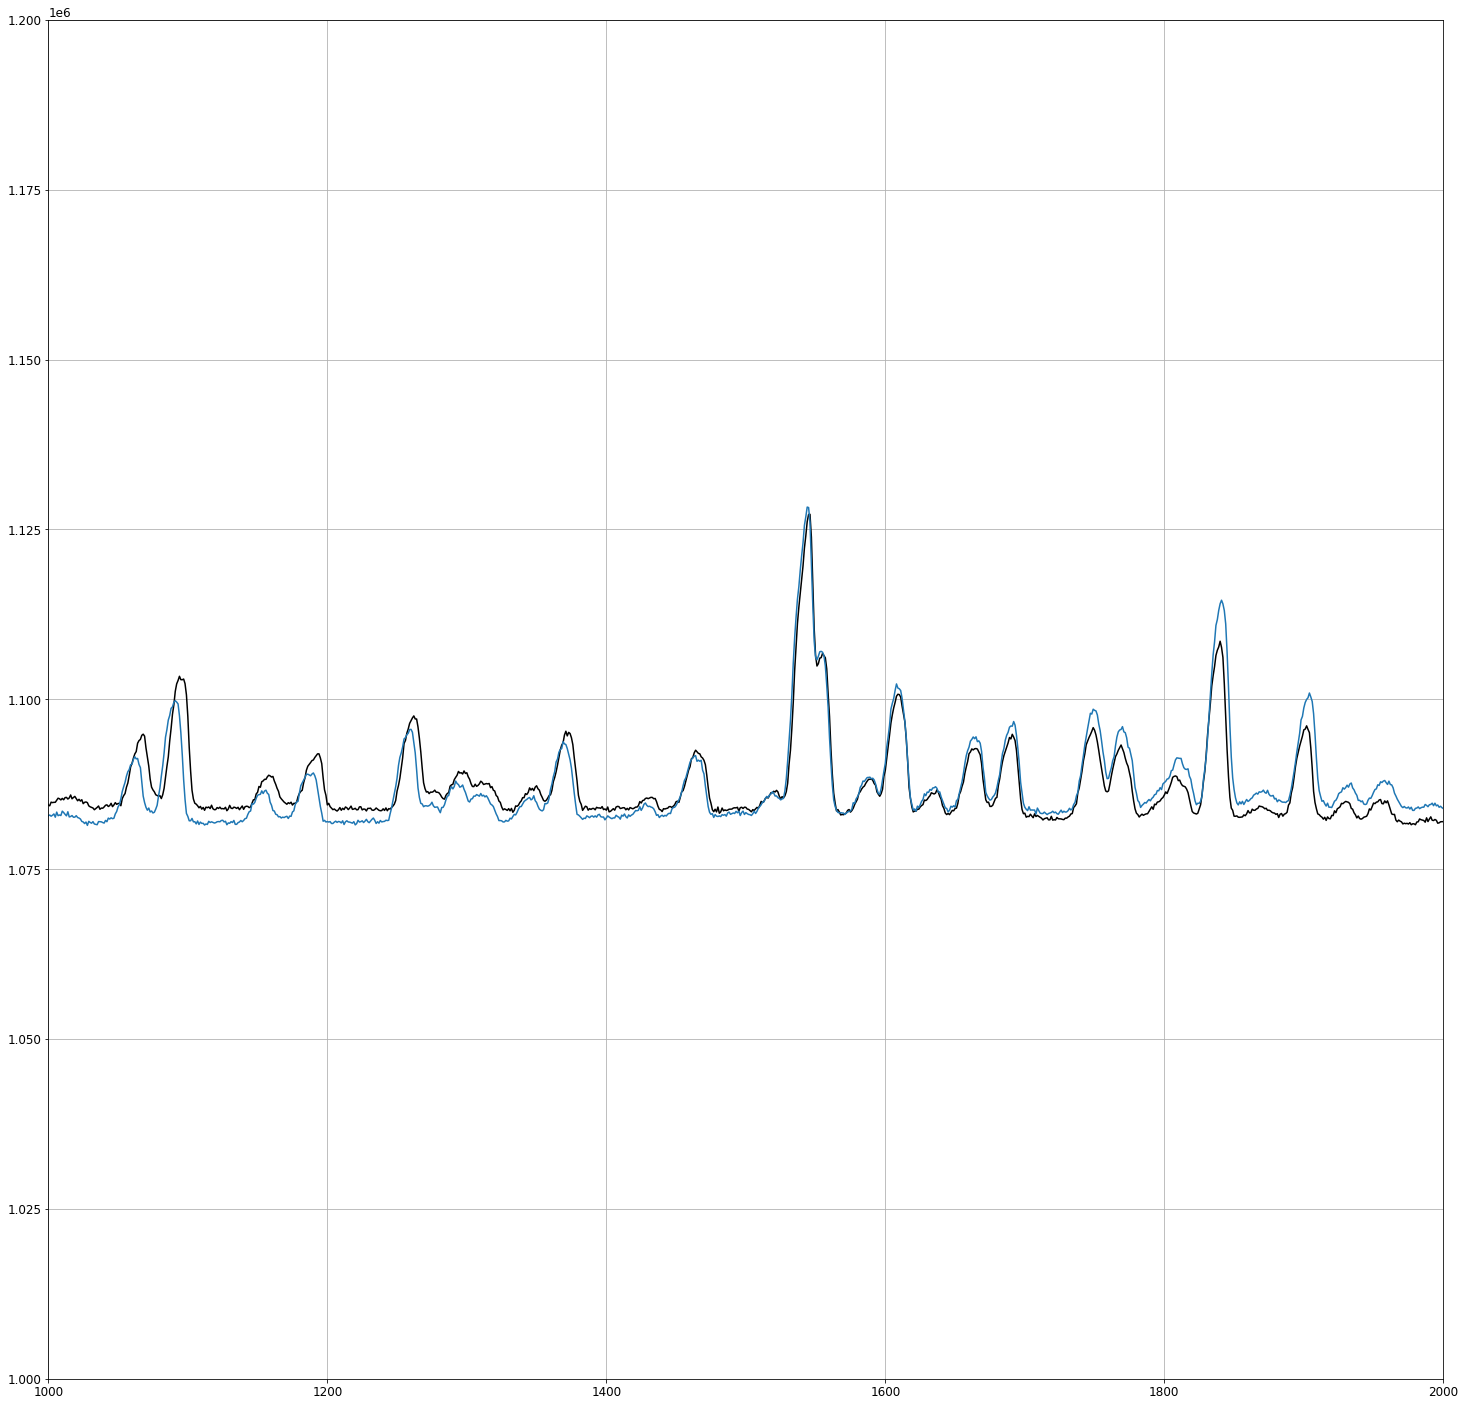

In [45]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'H_600000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'H_605000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 930, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)
ylim(1*1e6, 1.2*1e6)

(1000000.0, 1200000.0)

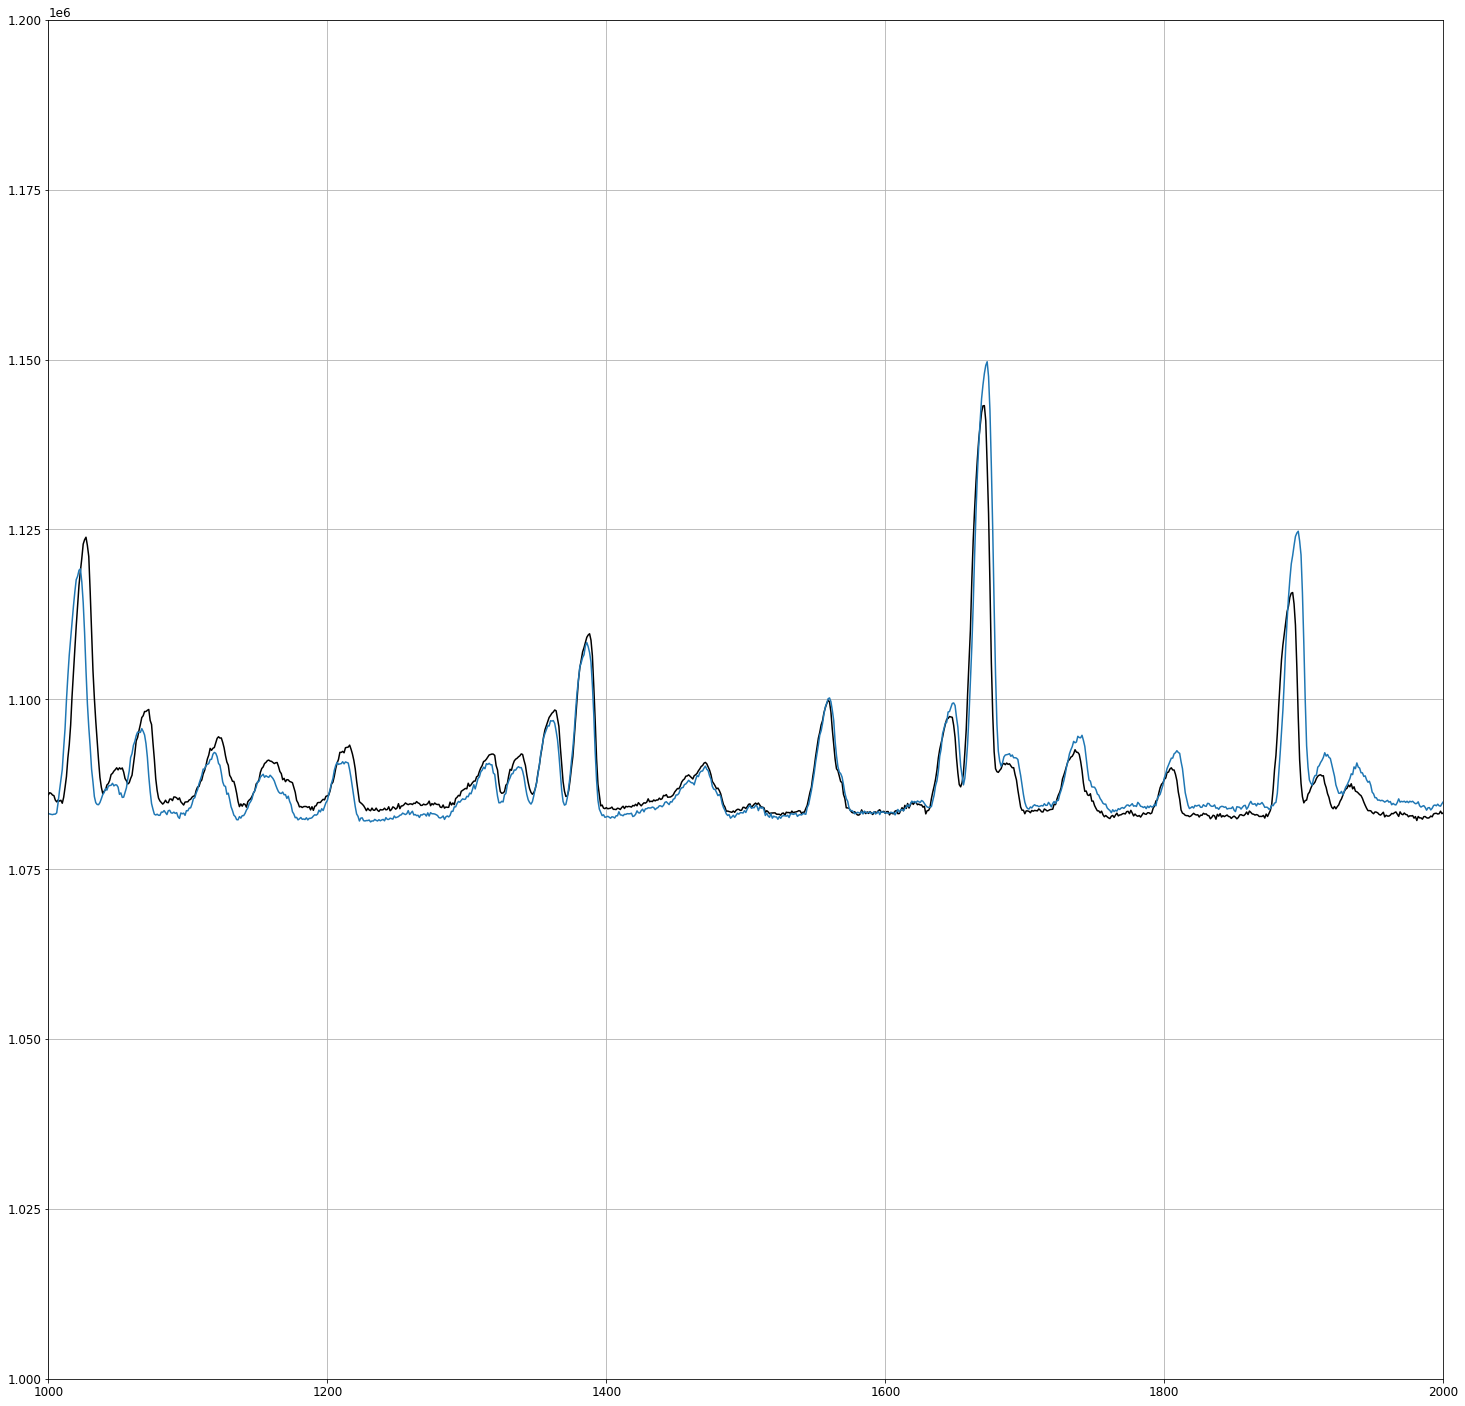

In [51]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'H_550000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'H_555000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 954, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)
ylim(1*1e6, 1.2*1e6)

### モーター量と重なり量の関係

[ 1.75040246e-09 -2.35161638e-03  1.71291074e+03]


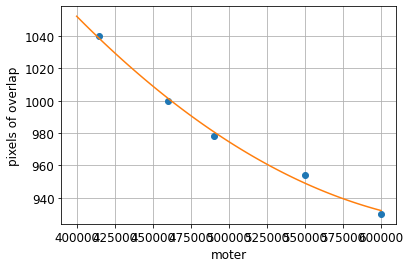

In [55]:
index = np.array([415000,460000, 490000, 550000, 600000])
overlap = np.array([1040, 1000, 978, 954, 930])
plot(index, overlap, 'o')

fun = np.poly1d(np.polyfit(index, overlap, 2))
x = np.linspace(400000, 600000, 100)
plot(x, fun(x))

grid()

xlabel('moter')
ylabel('pixels of overlap')

print(fun.coef)

# 1枚のグラフへまとめる
### Neon

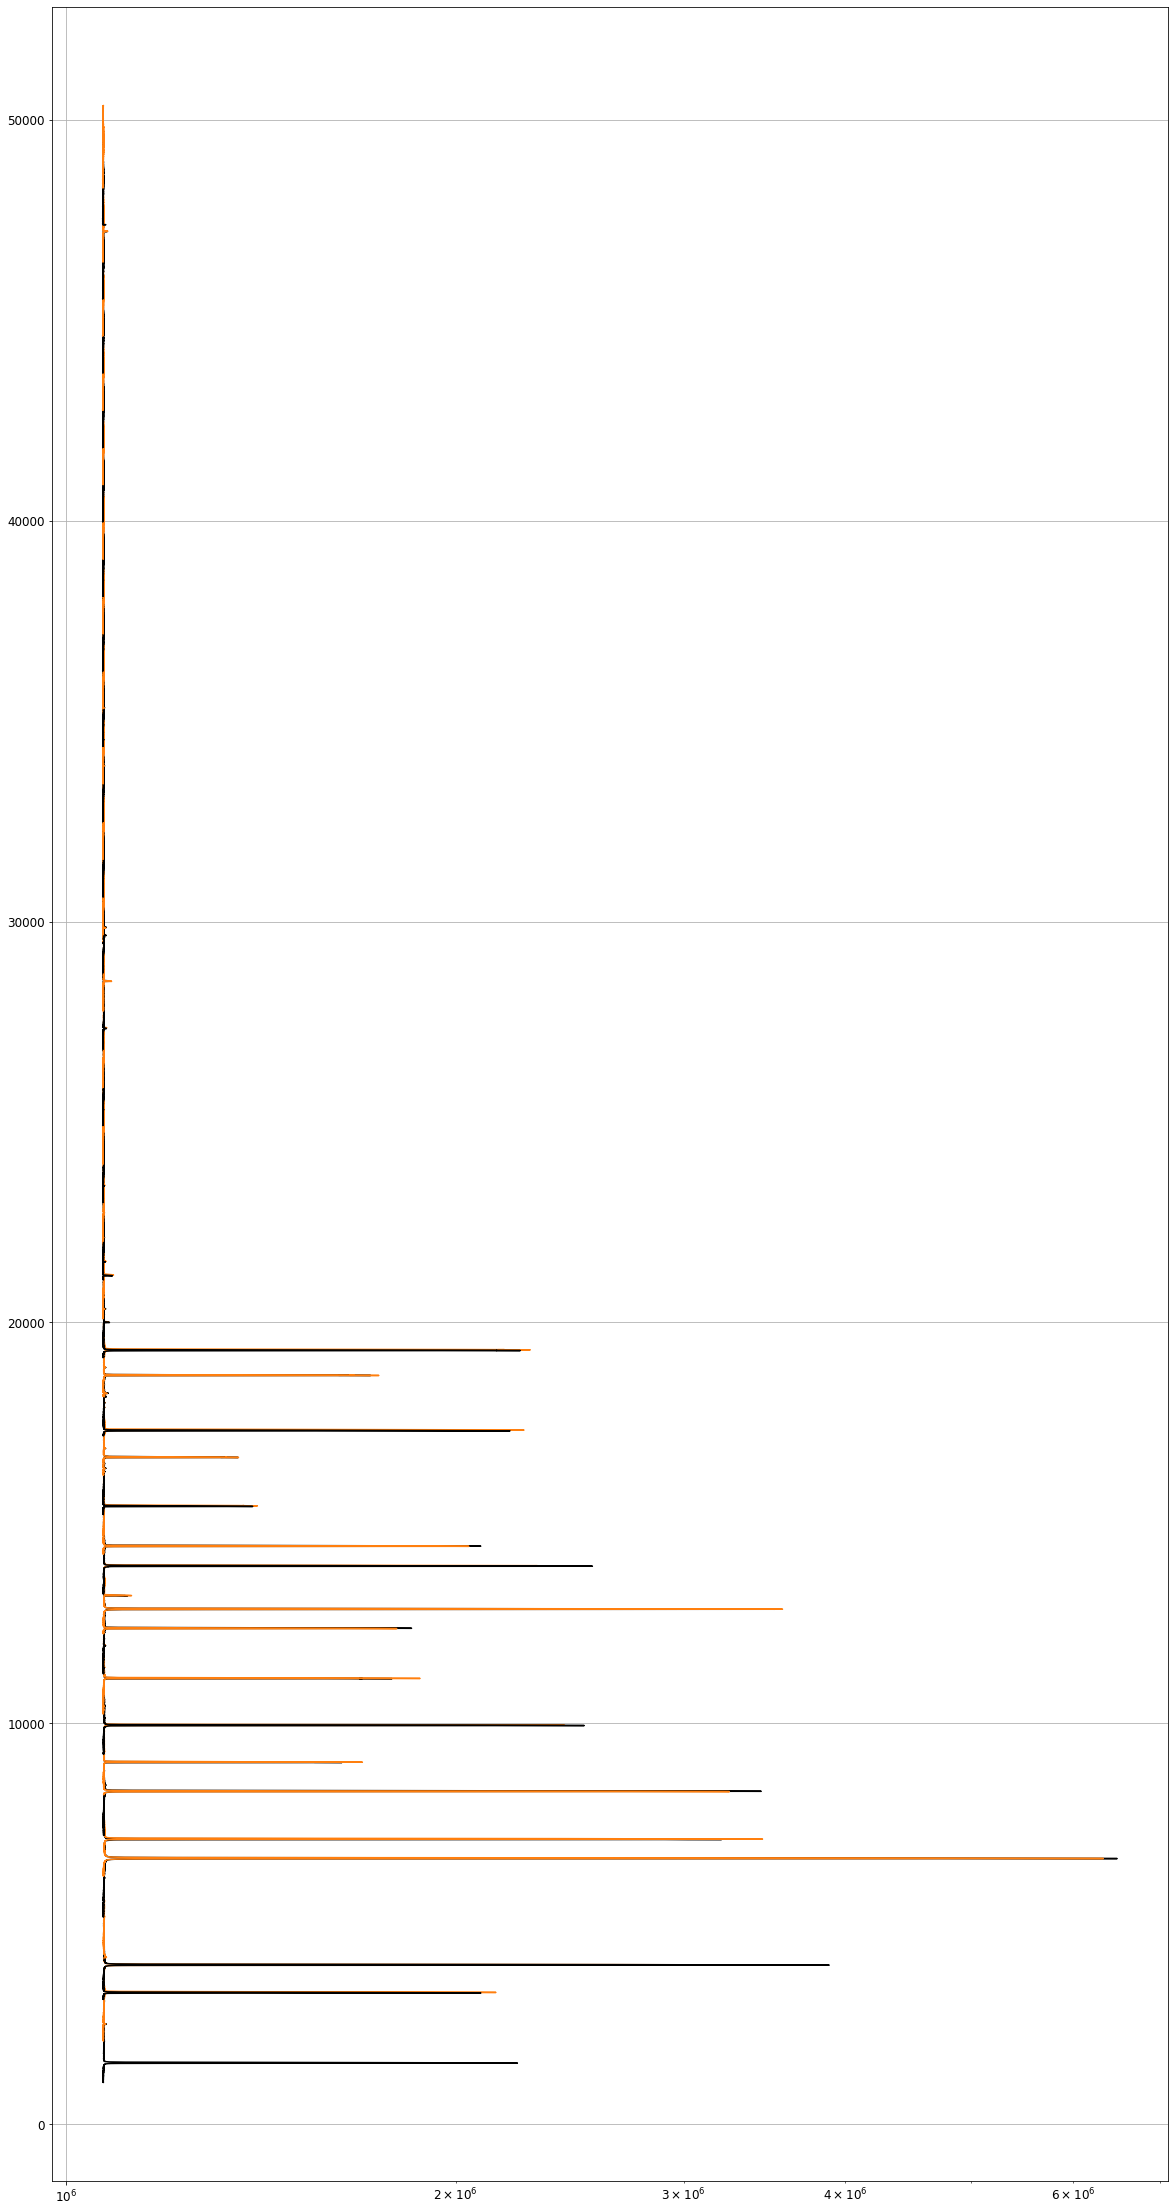

In [56]:
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(50)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,40])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
xscale('log')

### Hydrogen

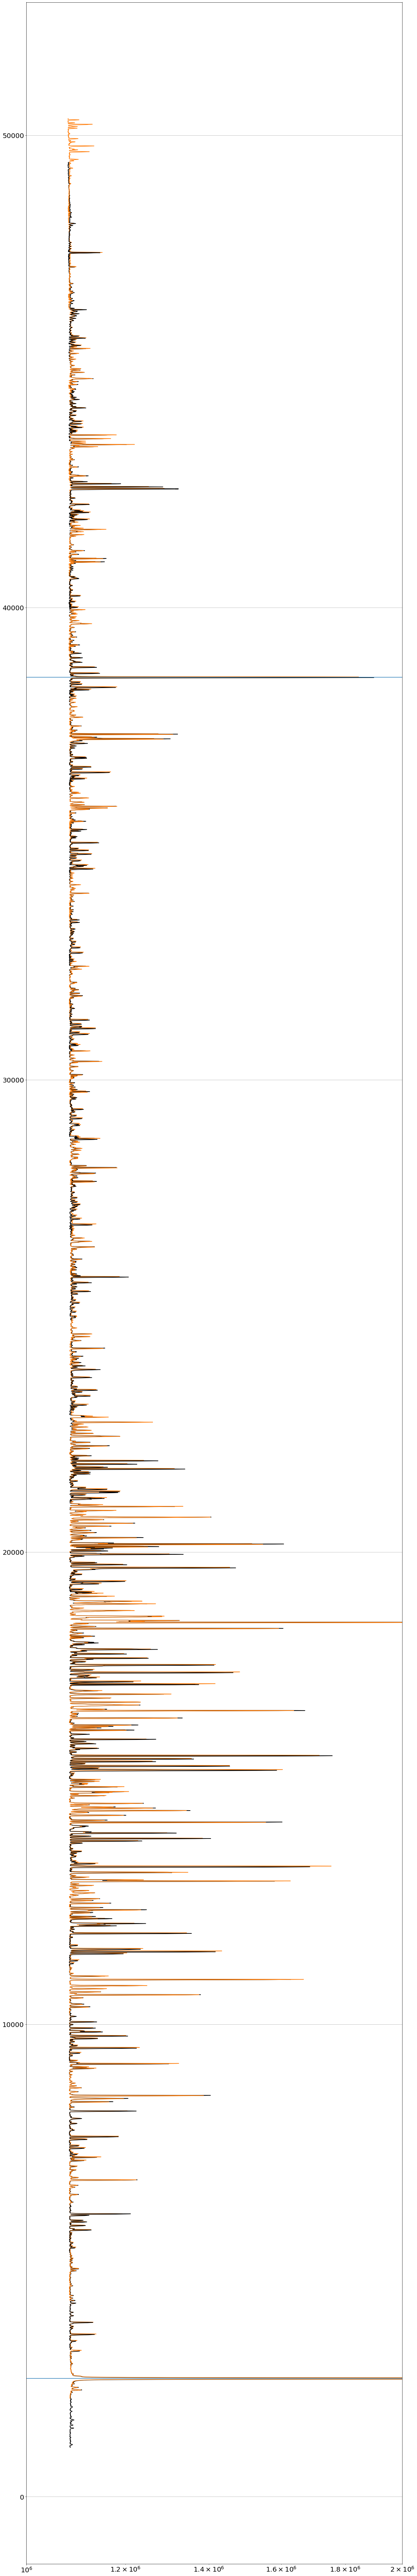

In [75]:
R = [f'H_{410000 + 5000*i}.nc' for i in range(50)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,140])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
axhline(2504)
axhline(38525)
xlim(10e5, 2*10e5)
xscale('log')

# 大体の波長を求める
バルマー系列からネオンの大体の波長を求める

Text(10000000.0, 38525, '486.135nm')

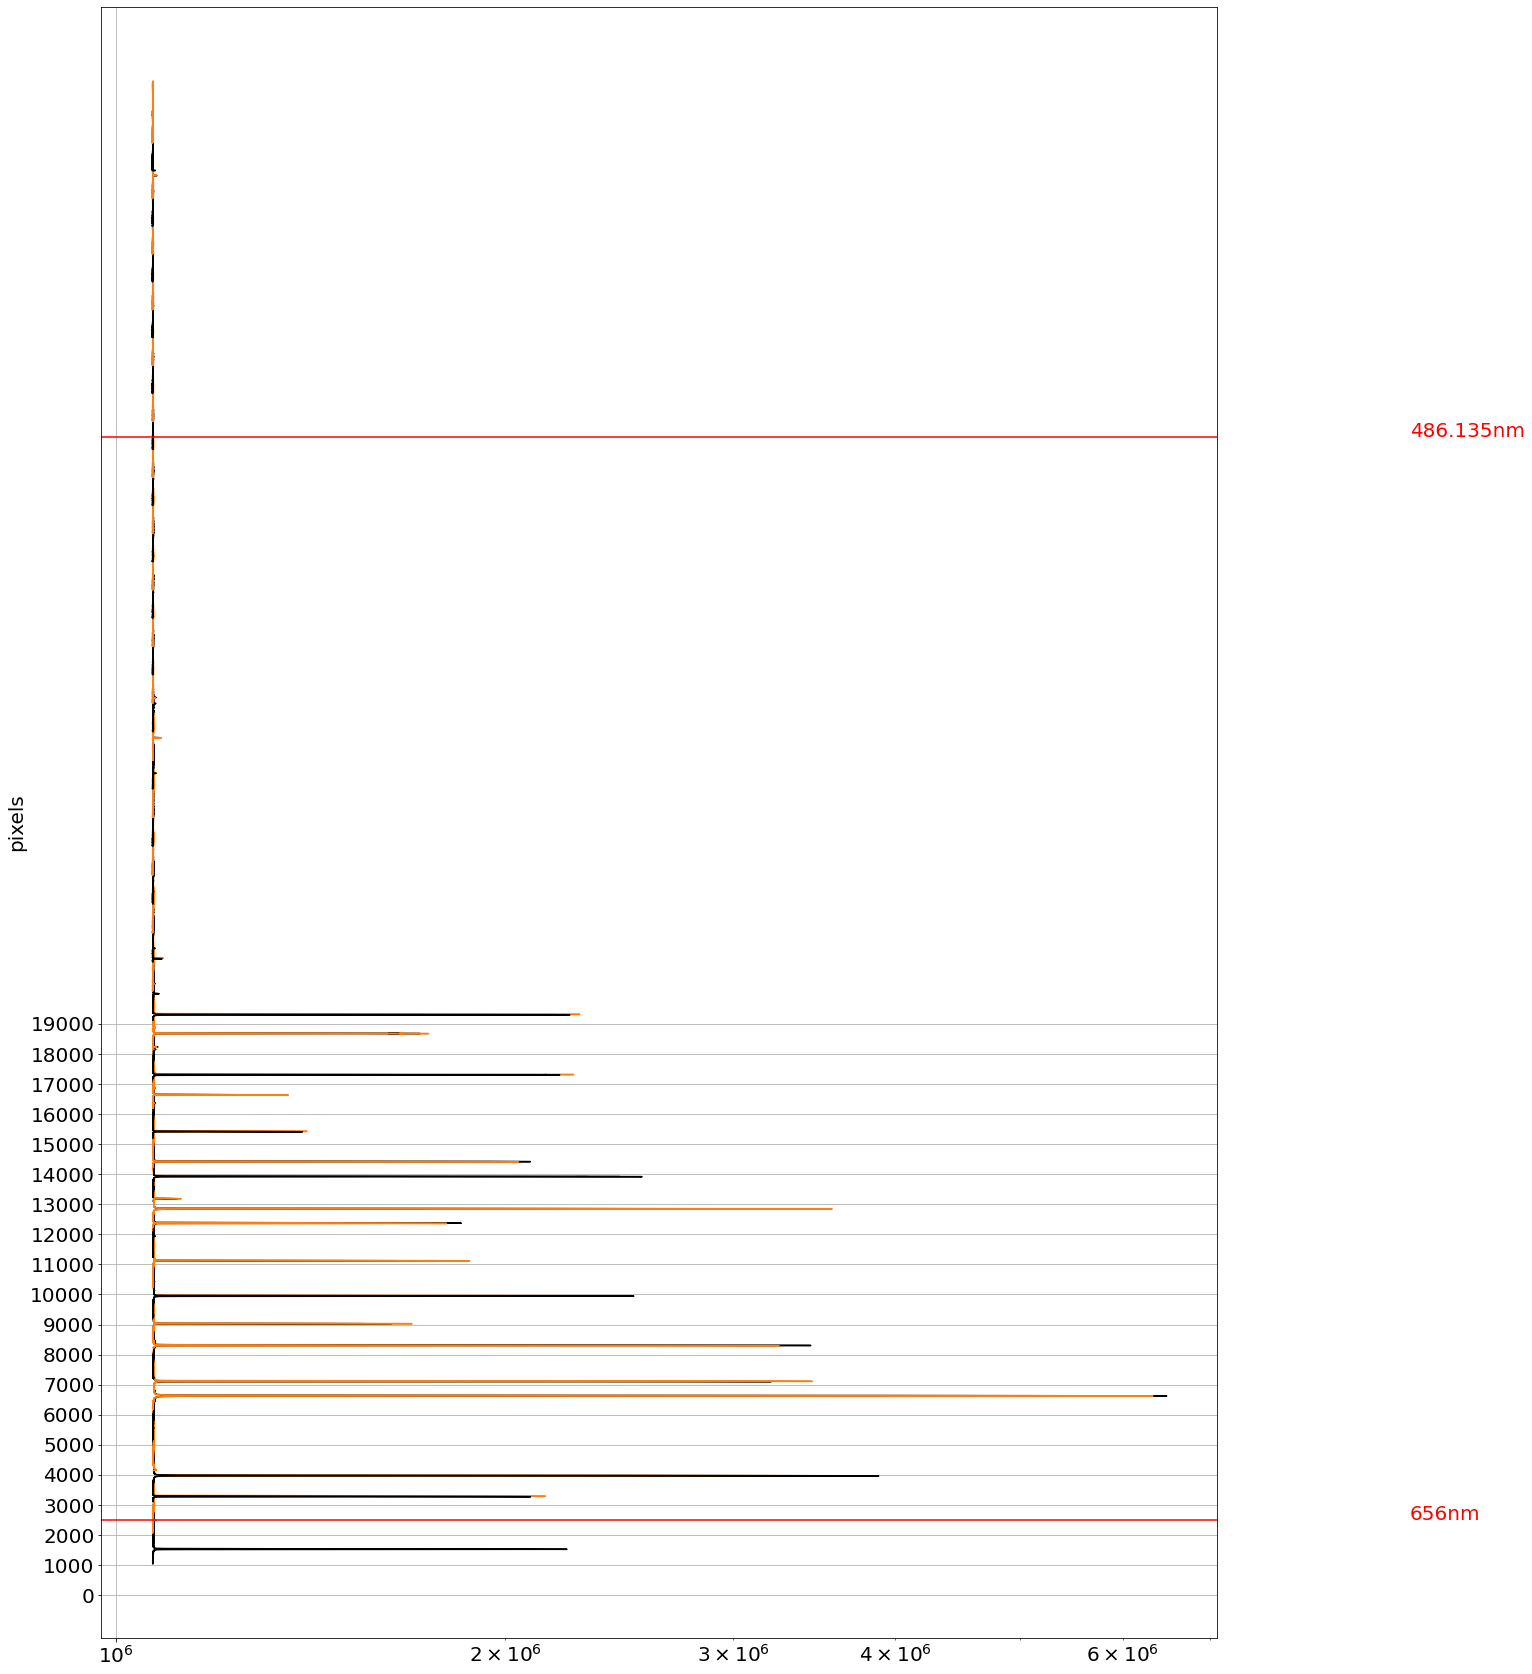

In [78]:
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(50)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,30])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
rcParams['font.size'] = 20
xscale('log')
yticks(range(0, 20000, 1000))
ylabel('pixels')

axhline(2504, color='red')
text(1e7, 2504, '656nm', color='red')
axhline(38525, color='red')
text(1e7, 38525, '486.135nm', color='red')

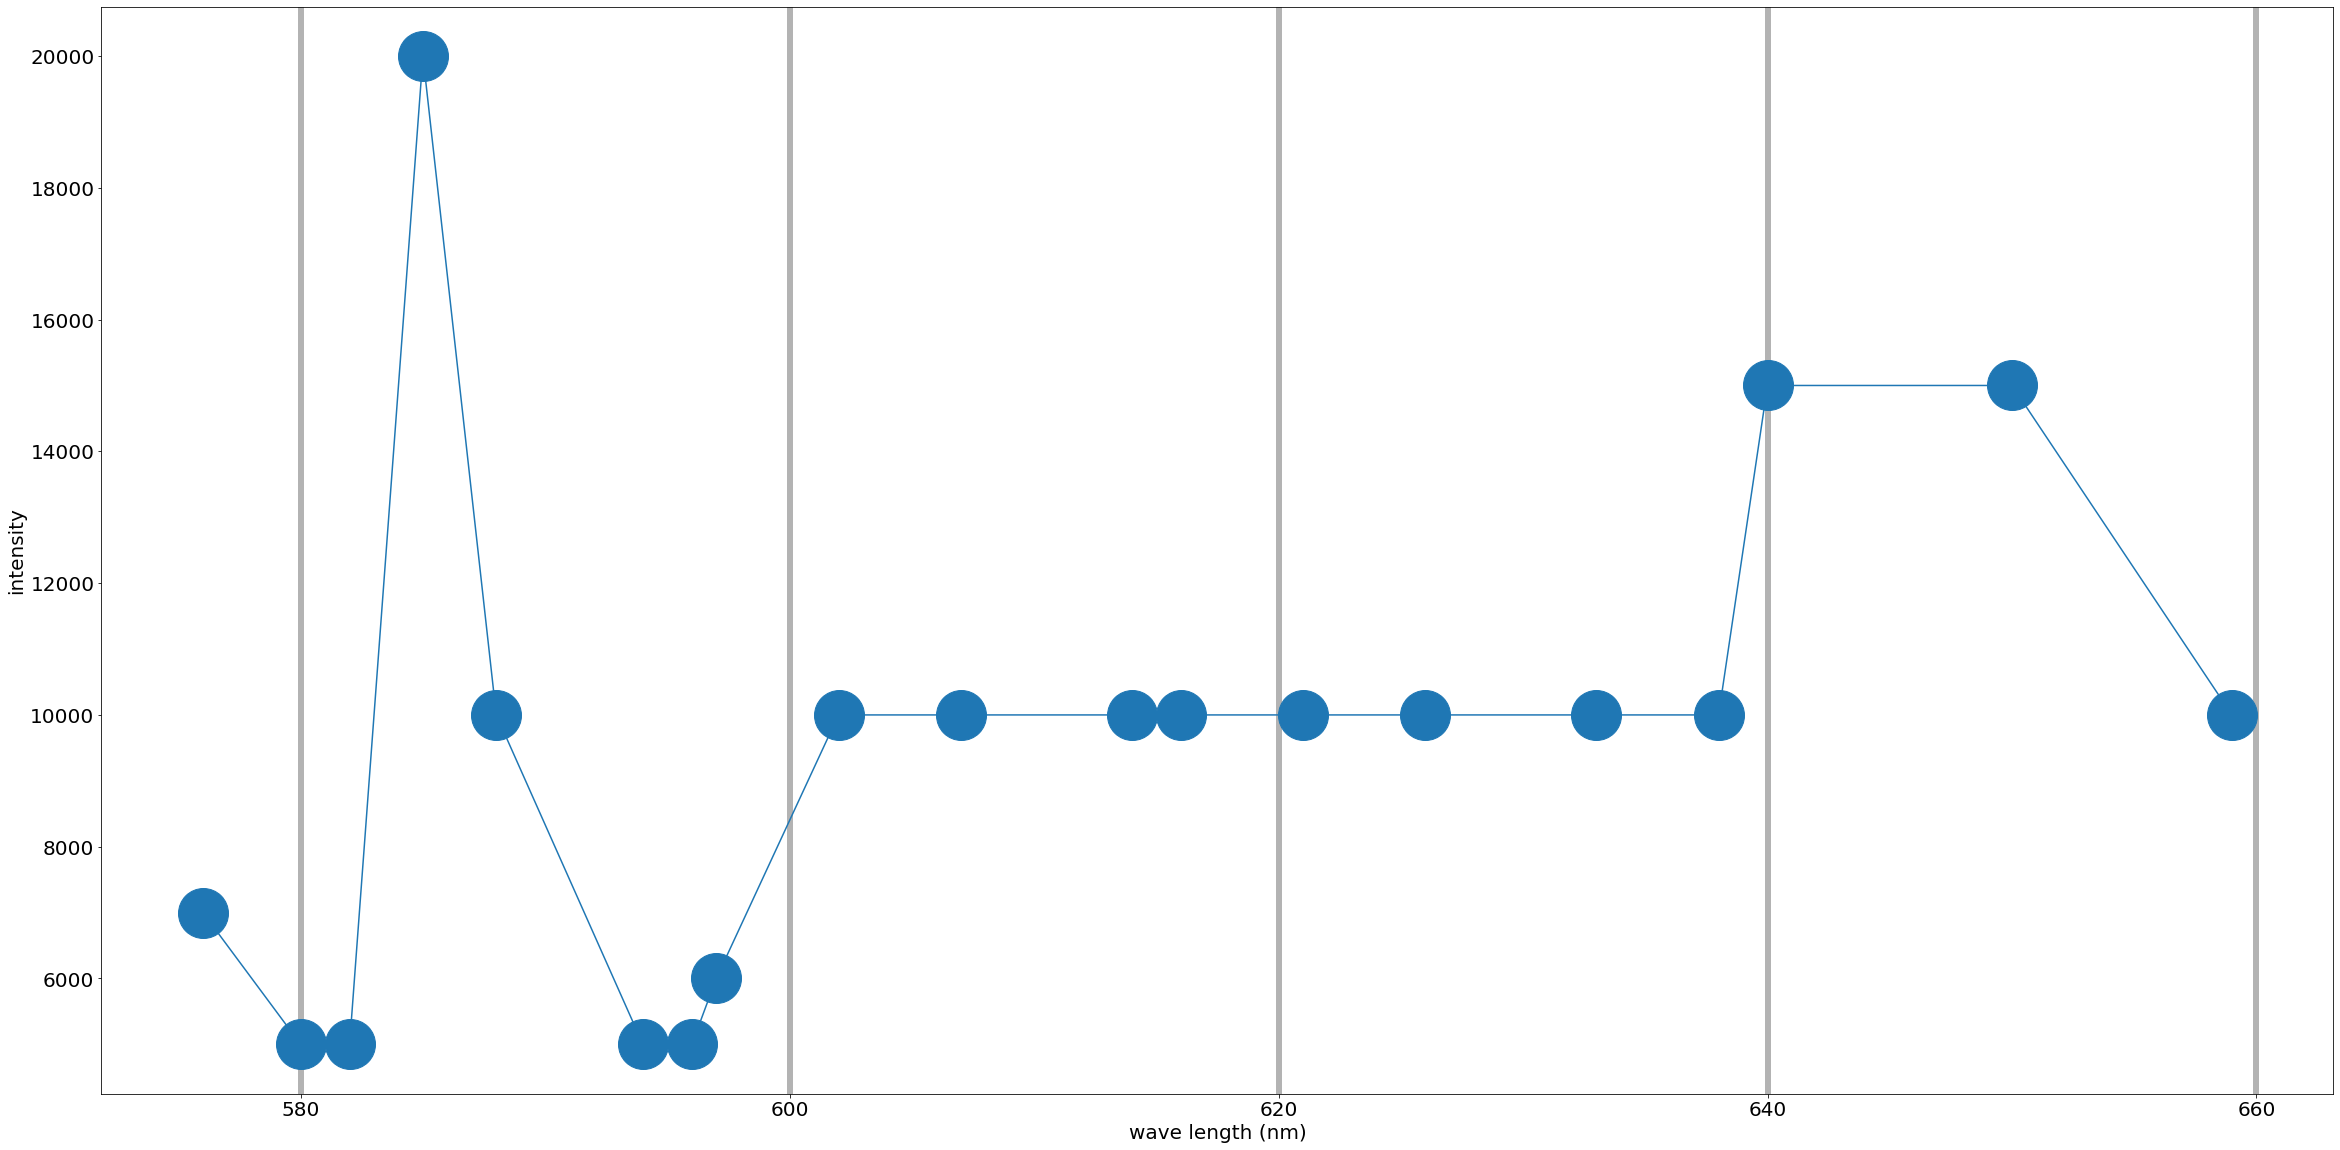

In [82]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([40,20])
grid(which='major', linewidth=6, axis='x', alpha=10)

# wave_length = np.array([454, 471, 479, 483, 488, 495, 534, 540, 576, 580, 582, 585, 588, 594, 596, 597, 602, 607, 614, 616, 621, 626, 633, 638, 640, 650, 659])
# intensity = np.array([10000, 15000, 10000, 10000, 10000, 10000, 10000, 20000, 7000, 5000, 5000, 20000, 10000, 5000, 5000, 6000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 15000, 15000, 10000])

wave_length = np.array([576, 580, 582, 585, 588, 594, 596, 597, 602, 607, 614, 616, 621, 626, 633, 638, 640, 650, 659])
intensity = np.array([7000, 5000, 5000, 20000, 10000, 5000, 5000, 6000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 15000, 15000, 10000])

plot(wave_length, intensity, marker='o', markersize=50)

xlabel('wave length (nm)')
ylabel('intensity')
rcParams['font.size'] = 20